In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for wordcloud making and image importing
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# And libraries for data transformation
import datetime

#words counter
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.tokenize import word_tokenize


# sentiment 
from textblob import TextBlob


In [2]:
# load data
df = pd.read_csv('csv/2020-01.csv')
df.head()

/Users/allen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id_str                      created_at       state sentiment  \
0  1222384689320644609  Wed Jan 29 05:03:15 +0000 2020  California  positive   
1  1222384689467383809  Wed Jan 29 05:03:15 +0000 2020  California  negative   
2  1222384690813796353  Wed Jan 29 05:03:15 +0000 2020  California   neutral   
3  1222384691900121094  Wed Jan 29 05:03:16 +0000 2020  California  negative   
4  1222384693590425601  Wed Jan 29 05:03:16 +0000 2020  California  positive   

                                          text_clean  
0  coronavirus isn’t big deal italian authorities...  
1  nothing evil emperor poop didn’t come clean he...  
2                            tf virus china get bape  
3  kellybadbuttt oakland medical center open oper...  
4  welli guess wait tomorrow see many people us a...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145355 entries, 0 to 1145354
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   id_str      1145355 non-null  object
 1   created_at  1145348 non-null  object
 2   state       1063781 non-null  object
 3   sentiment   1145355 non-null  object
 4   text_clean  1145348 non-null  object
dtypes: object(5)
memory usage: 43.7+ MB


In [4]:
df.isnull().sum(axis = 0)

id_str            0
created_at        7
state         81574
sentiment         0
text_clean        7
dtype: int64

In [5]:
# delete the null row by 'text_clean'
df = df[df['text_clean'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1145348 entries, 0 to 1145354
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   id_str      1145348 non-null  object
 1   created_at  1145348 non-null  object
 2   state       1063781 non-null  object
 3   sentiment   1145348 non-null  object
 4   text_clean  1145348 non-null  object
dtypes: object(5)
memory usage: 52.4+ MB


In [6]:
df.isnull().sum(axis = 0)

id_str            0
created_at        0
state         81567
sentiment         0
text_clean        0
dtype: int64

In [7]:
import re, datetime
def extract_date(x):
#     match = re.search('\d{2}-\d{2}', x)
#     date = datetime.datetime.strptime(match.group(), '%m-%d').date()
    x_list = x.split(' ')
    date = x_list[1] + '-' + x_list[2]
    return date
df['date'] = df['created_at'].apply(lambda x: extract_date(x))
df.head()

id_str                      created_at       state sentiment  \
0  1222384689320644609  Wed Jan 29 05:03:15 +0000 2020  California  positive   
1  1222384689467383809  Wed Jan 29 05:03:15 +0000 2020  California  negative   
2  1222384690813796353  Wed Jan 29 05:03:15 +0000 2020  California   neutral   
3  1222384691900121094  Wed Jan 29 05:03:16 +0000 2020  California  negative   
4  1222384693590425601  Wed Jan 29 05:03:16 +0000 2020  California  positive   

                                          text_clean    date  
0  coronavirus isn’t big deal italian authorities...  Jan-29  
1  nothing evil emperor poop didn’t come clean he...  Jan-29  
2                            tf virus china get bape  Jan-29  
3  kellybadbuttt oakland medical center open oper...  Jan-29  
4  welli guess wait tomorrow see many people us a...  Jan-29

# 1. Data Visualization

In [18]:
# tweets count per day
order = sorted(df['date'].unique())
plt.figure()
ax = sns.countplot(x='date', data=df, order=sorted(df['date'].unique()))
ax.set_ylabel('Tweets')
plt.show()

TypeError: Cannot pass values for both `x` and `y`

<Figure size 1152x1152 with 0 Axes>

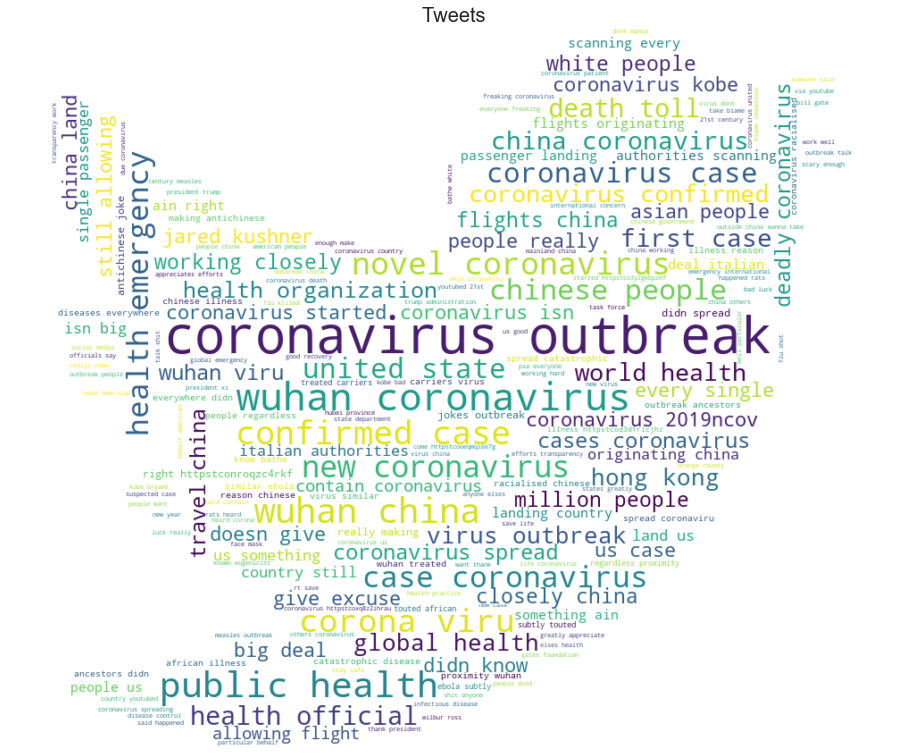

In [9]:
#words cloud of most comman words 
pos_mask = np.array(Image.open('src/twitter_mask.png'))
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'].tolist())

wordcloud = WordCloud(mask=pos_mask, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Tweets',size=20)
plt.show()

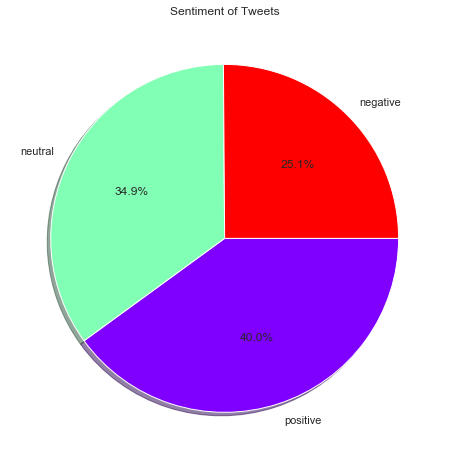

In [10]:
import matplotlib.cm as cm
plt.figure(figsize=(8,8))
#count data rating
counts = df['sentiment'].value_counts()
#rating pie
values = counts.values
labels = counts.index
explode = (0, 0, 0)
colors = cm.rainbow(np.linspace(0, 1, len(labels)))
plt.pie(values, 
        colors=colors, 
        labels=labels,
        explode=explode, 
        autopct='%1.1f%%',
        counterclock=False,
        shadow=True)
plt.title('Sentiment of Tweets')
plt.show()

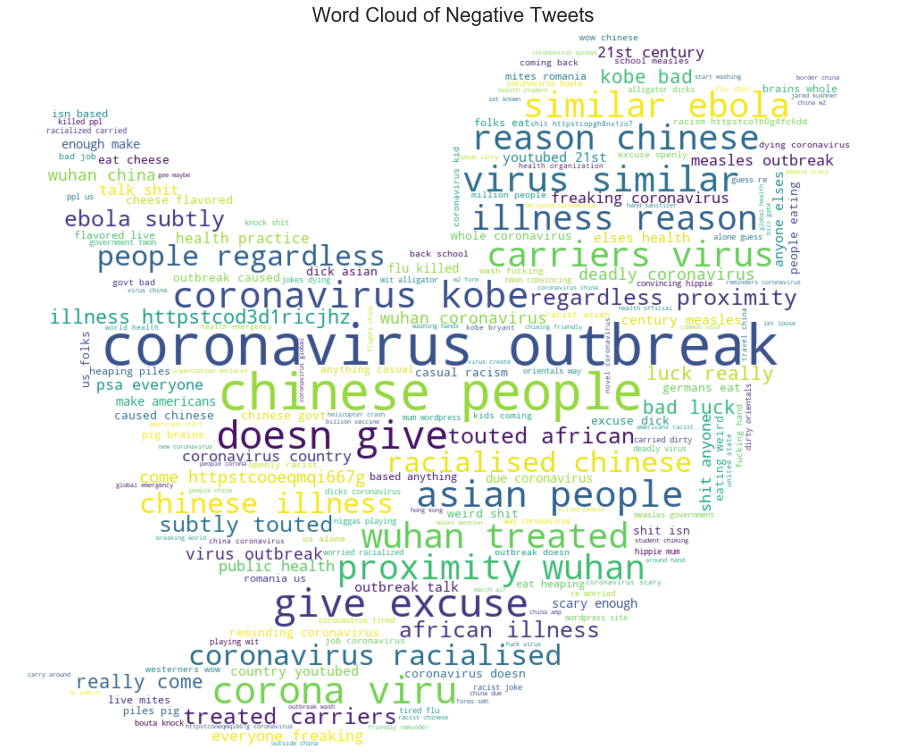

In [11]:
#words cloud of most comman words from negative tweets
pos_mask = np.array(Image.open('src/twitter_mask.png'))
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='negative'].tolist())

wordcloud = WordCloud(mask=pos_mask, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Word Cloud of Negative Tweets',size=20)
plt.show()

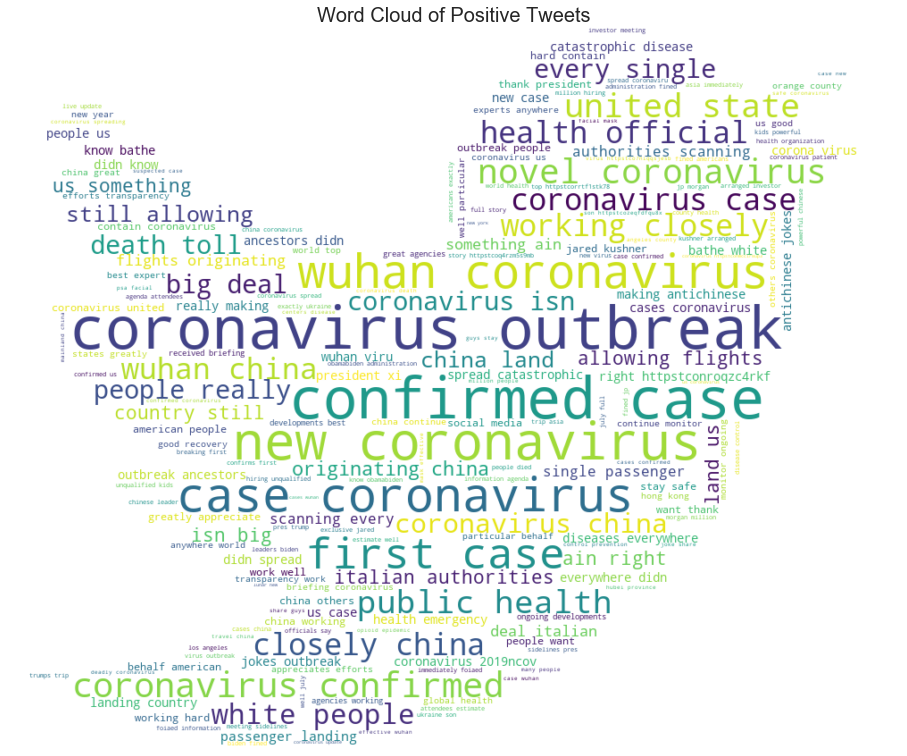

In [12]:
#words cloud of most comman words from positive tweets
pos_mask = np.array(Image.open('src/twitter_mask.png'))
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='positive'].tolist())

wordcloud = WordCloud(mask=pos_mask, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Word Cloud of Positive Tweets',size=20)
plt.show()

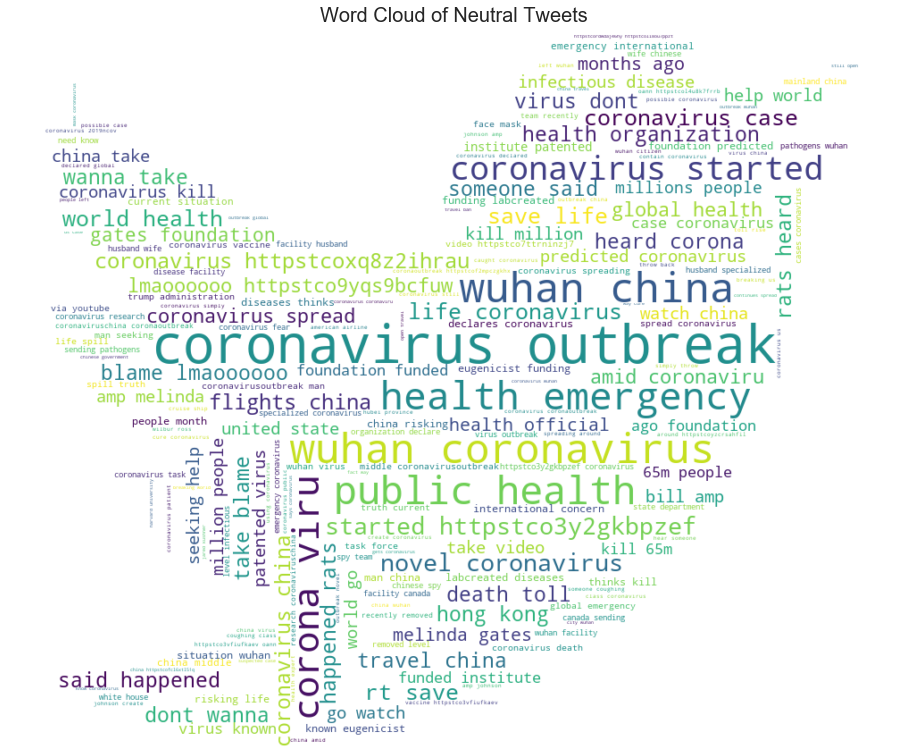

In [13]:
#words cloud of most comman words from neutral tweets
pos_mask = np.array(Image.open('src/twitter_mask.png'))
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='neutral'].tolist())

wordcloud = WordCloud(mask=pos_mask, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Word Cloud of Neutral Tweets',size=20)
plt.show()

In [14]:
from settings import states_full_dic
df['state_abb'] = df['state'].apply(lambda x: states_full_dic[x] if x is not np.nan else x)
df.head()

id_str                      created_at       state sentiment  \
0  1222384689320644609  Wed Jan 29 05:03:15 +0000 2020  California  positive   
1  1222384689467383809  Wed Jan 29 05:03:15 +0000 2020  California  negative   
2  1222384690813796353  Wed Jan 29 05:03:15 +0000 2020  California   neutral   
3  1222384691900121094  Wed Jan 29 05:03:16 +0000 2020  California  negative   
4  1222384693590425601  Wed Jan 29 05:03:16 +0000 2020  California  positive   

                                          text_clean    date state_abb  
0  coronavirus isn’t big deal italian authorities...  Jan-29        CA  
1  nothing evil emperor poop didn’t come clean he...  Jan-29        CA  
2                            tf virus china get bape  Jan-29        CA  
3  kellybadbuttt oakland medical center open oper...  Jan-29        CA  
4  welli guess wait tomorrow see many people us a...  Jan-29        CA

In [15]:
states_abb = np.asarray(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
                        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
                        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
                        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
                        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

In [16]:
Counter(df['state']).most_common()

[('California', 186628),
 ('Texas', 114400),
 (nan, 81567),
 ('Florida', 76053),
 ('New York', 76035),
 ('Washington', 56373),
 ('Illinois', 35988),
 ('Pennsylvania', 32550),
 ('Georgia', 32176),
 ('Ohio', 29934),
 ('Arizona', 29626),
 ('Massachusetts', 26786),
 ('North Carolina', 24717),
 ('Virginia', 24228),
 ('Michigan', 23797),
 ('New Jersey', 21453),
 ('Maryland', 19442),
 ('Colorado', 18328),
 ('Tennessee', 16785),
 ('Oregon', 16335),
 ('Nevada', 14510),
 ('Minnesota', 14338),
 ('Missouri', 13682),
 ('Indiana', 13568),
 ('Louisiana', 11609),
 ('Wisconsin', 10780),
 ('South Carolina', 9915),
 ('Kentucky', 9665),
 ('Connecticut', 9457),
 ('Oklahoma', 8610),
 ('Arkansas', 6257),
 ('Kansas', 6238),
 ('Hawaii', 5999),
 ('Utah', 5709),
 ('Alabama', 5498),
 ('New Mexico', 5115),
 ('Maine', 4999),
 ('Idaho', 4870),
 ('Iowa', 4869),
 ('Mississippi', 4601),
 ('Nebraska', 4250),
 ('Alaska', 4144),
 ('West Virginia', 3616),
 ('Montana', 3133),
 ('New Hampshire', 2965),
 ('District of Columbi

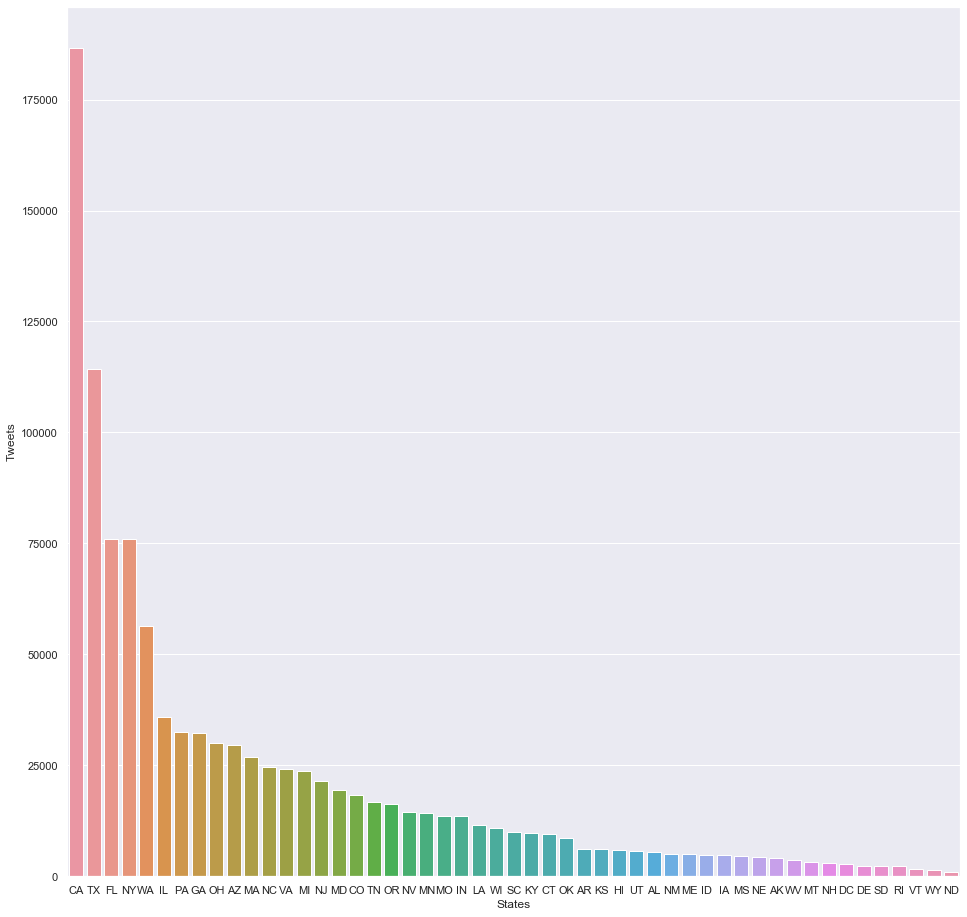

In [23]:
# tweets count per day
plt.figure()
ax = sns.countplot(x='state_abb', data=df, order=df['state_abb'].value_counts().index)
ax.set_ylabel('Tweets')
ax.set_xlabel('States')
plt.show()

In [17]:
from plotly.offline import iplot
from settings import states_abb
# tweets per state
tweets_perstate = np.asarray(df.groupby('state_abb').state_abb.count())

tweets_scale = [[0, 'rgb(229, 239, 245)'], [1, 'rgb(1, 97, 156)']]

data = [dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = tweets_scale,
        locations = states_abb,
        locationmode = 'USA-states',
        z = tweets_perstate,
        marker = dict(
            line = dict(
                color = 'rgb(255, 255, 255)',
                width = 2)
            ),
        colorbar = dict(
            title = 'Tweets per state')
        )]

layout = dict(
         title = 'United States Heatmap of Tweets Related to COVID-19',
         geo = dict(
             scope = 'usa',
             projection = dict(type = 'albers usa'),
             countrycolor = 'rgb(255, 255, 255)',
             showlakes = True,
             lakecolor = 'rgb(255, 255, 255)')
         )

figure = dict(data = data, layout = layout)
iplot(figure)